## Study the distribution of LDA/NMF topics

In [1]:
import pickle
from utils import * 
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

Load the pre-trained models

In [208]:
DATAPASS = '../../../yelp10/dataset/business.json'
business = load_json_to_df(DATAPASS)

In [2]:
def load_topic_model(vectorizer_file_name, topic_model_file_name):
    with open(vectorizer_file_name, "rb") as f:
        vectorizer = pickle.load(f)
    with open(topic_model_file_name, "rb") as f:
        topic_model = pickle.load(f)
    return vectorizer, topic_model

In [3]:
vec, tm = load_topic_model('model/pizza_tfidf_vectorizer.pkl','model/pizza_nmf.pkl')

In [4]:
vec2, tm2 = load_topic_model('model/pizza_count_vectorizer.pkl','model/pizza_lda.pkl')

In [5]:
vec3, tm3 = load_topic_model('model/chinese_tfidf_vectorizer.pkl','model/chinese_nmf.pkl')

In [6]:
vec4, tm4 = load_topic_model('model/chinese_count_vectorizer.pkl','model/chinese_lda.pkl')

In [7]:
def display_topics(model, feature_names, n_top_words):
    for topic_index, topic in enumerate(model.components_):
        print("Topic %d:" % topic_index)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words:-1]]))

In [8]:
tm.components_

array([[  5.35318219e-02,   0.00000000e+00,   4.09802948e-02, ...,
          7.96897006e-02,   3.98538679e-02,   0.00000000e+00],
       [  7.86209423e-02,   1.88202333e-01,   3.27705625e-02, ...,
          2.97546372e-02,   9.73259392e-02,   0.00000000e+00],
       [  3.54345514e-01,   2.62719244e+00,   1.12437870e-01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  4.13455229e-02,   0.00000000e+00,   4.27813136e-04, ...,
          0.00000000e+00,   6.59642074e-02,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.22001617e-02,   1.51870707e-01,   0.00000000e+00],
       [  1.37329447e-02,   0.00000000e+00,   7.26685010e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [9]:
tm2.components_

array([[  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000001e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       ..., 
       [  2.00000000e-02,   1.30035557e+04,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.00000000e-02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02],
       [  2.00000000e-02,   2.24278850e+02,   2.00000000e-02, ...,
          2.00000000e-02,   2.00000000e-02,   2.00000000e-02]])

In [10]:
# DATAPASS2 = '../../../yelp10/dataset/review.json'
# review = load_json_to_df(DATAPASS2)

In [11]:
# DATAPASS = '../../../yelp10/dataset/business.json'
# business = load_json_to_df(DATAPASS)

In [12]:
def business_id_retrieval(cat, business):
    '''
    
    Input:
        cat(str) : category
        business(dataframe) : the business data
    Output:
        id_list(set) : business ids of a particular category
    '''
    id_list = set()
    idx = 0
    for row in business.values:
        categories = row[3]
        if cat in categories:
            id_list.add(row[2])
    return id_list

In [13]:
# pizza = business_id_retrieval('Pizza', business)
# review_pizza = review.loc[review['business_id'].isin(pizza)]
# review_pizza.to_csv('pizza_reviews.csv', index = False)

In [14]:
review_pizza = pd.read_csv('pizza_reviews.csv')

In [15]:
# chinese = business_id_retrieval('Chinese', business)
# review_chinese = review.loc[review['business_id'].isin(chinese)]
# review_chinese.to_csv('chinese_reviews.csv', index = False)

In [16]:
review_chinese = pd.read_csv('chinese_reviews.csv')

In [17]:
import random
sample_id = random.sample(range(review_pizza.shape[0]),5)

In [18]:
def highlight_topic_words(sentence, vec):
    tokenizer = vec.build_tokenizer()
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    out = []
    for word in tokenizer(sentence):
        if word.lower() in topic_words:
            out.append('\x1b[6;30;43m' + word + '\x1b[0m')
        else:
            out.append(word)
    print (' '.join(out))

In [19]:
for t in review_pizza.iloc[sample_id]['text']:
    highlight_topic_words(t, vec)
    print ('\n')

come here every Sunday for pasta The dinners are generous enough to split with dinner partner or to take home for another dinner split mine with my husband and order second salad For what you get we are always satisfied presume the ingredients are good based on what on the table fresh cheese mild hot peppers sea salt real cream Colavita balsamic vinegar Extra virgin olive oil It all good is all good including extra napkins The food here is just like home Love it


FAVORITE PIZZA IN AZ This is my favorite type of sicilian square thick pizza in the state of Arizona Pauly staff are also very friendly


ve never been to New York but imagine this is how it taste Pizza and wings are excellent My go to place for pizza and wings in Glendale


Tailgaters is large restaurant with good separations for groups or gatherings with nice outdoor seating area with propane fire pit and patio seating when its not 110 The menu at Tailgaters Sports Grill Il Primo Pizza Wings is large with great selection to

In [20]:
sample_id = random.sample(range(review_chinese.shape[0]),5)

In [21]:
for t in review_chinese.iloc[sample_id]['text']:
    highlight_topic_words(t, vec3)
    print ('\n')

eat here all the time First check and first review This is great place for lunch and dinner The menu is funny mix of Asian and American dishes that all hit home runs My in laws have to eat here every time they are in town Big fan of the fire cracker chicken and the meatloaf Also they have amazing potstickers Happy hour has great prices and drinks are very reasonable am big fan of patios and theirs is perfect highly recommend try


The food was OK some dishes have no taste but the staff are quiet unhelpful once they know it is an all you can eat They hurry your order and throw it like they want to get rid of you quickly was with my kids for my birthday lunch The lady who took care of our table went straight to my 11 yrs old and asked her what her age is as was confused why she would ask that to my daughter m6 daufhter was equally confused and took few seconds to understand what she was asking by then said she is 11 The look on tge ladys face was like was cheating she spoilt my day that 

## Can we assume 1 topic per sentence?

Following *Sentence Level Recurrent Topic Model* 

Each sentence is a sum of topic index for each word (Product always resulted 0 because of the lack of overlaps)

In [118]:
def get_k_index(sentence, vec, tm):
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    if sum(k_index) == 0:
        prob = np.array([0.]*tm_mat.shape[0])
    else:
        prob = k_index/(sum(k_index))
    return k_index, prob

In [23]:
sampleA = review_chinese.iloc[sample_id]['text'].values[2]

In [24]:
k, p = get_k_index(sampleA, vec3, tm3)

In [25]:
p[k.argsort()[:-4:-1]]

array([ 0.22050227,  0.15162874,  0.08480703])

In [26]:
def display_ith_topics(model, feature_names, n_top_words, ith):
    for i in ith:
        print("Topic %d:" % i)
        print(" ".join([feature_names[j] for j in model.components_[i].argsort()[:-n_top_words:-1]]))

In [27]:
display_ith_topics(tm3, vec3.get_feature_names(), 10, k.argsort()[:-4:-1])

Topic 7:
sushi roll fresh bar rolls sashimi tuna salmon fish
Topic 28:
best ve far vegas years town times tried eaten
Topic 6:
good pretty overall prices little bit value pricey thing


In [28]:
sampleA

"Simply the best all around place for sushi and even for a mixed group of sushi lovers and haters. This is the best reasonably priced sushi I have yet to find. Friends I've taken here who do not like sushi ordered the Chinese menu items and were very satisfied. The Flaming Volcano is a great treat. They also have a good selection of beers and saki. I have yet to have reason to not keep returning for more."

In [29]:
print('SampleA is')
for i, j in zip(p[k.argsort()[:-4:-1]], k.argsort()[:-4:-1]):
    print ('{}%, Topic{}'.format(int(i*100), j))

SampleA is
22%, Topic7
15%, Topic28
8%, Topic6


Try to see the distribution of highest proportion of topic per sentence

In [30]:
def get_highest_prob(sentence, vec, tm):
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    return max(k_index/(sum(k_index))) if sum(k_index) != 0 else 0

In [31]:
get_highest_prob(sampleA, vec3,tm3)

0.22050226565955119

In [32]:
# random 5000 sample 
ids = random.sample(range(review_chinese.shape[0]),5000)

In [33]:
probs = []
for review in review_chinese.iloc[ids]['text'].values:
    sent_text = nltk.sent_tokenize(review)
    for s in sent_text:
        p = get_highest_prob(s, vec3, tm3)
        if p != 0:
            probs.append(p)

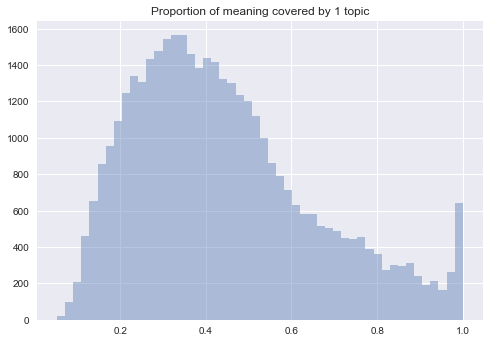

In [34]:
sns.distplot(probs, kde = False)
plt.title('Proportion of meaning covered by 1 topic')
plt.show()

In [35]:
def get_topic_threshold(sentence, vec, tm, thresh):
    analyzer = vec.build_analyzer()
    topic_words = vec.get_feature_names()
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for word in analyzer(sentence):
        if word in topic_words:
            k_index += tm_mat[:, topic_words.index(word)]
    
    counter = 0
    prob = 0.0
    if sum(k_index) == 0:
        return counter
    else:
        mat = sorted(k_index/(sum(k_index)), reverse = True)
        while (prob < thresh):
            prob += mat[counter]
            counter += 1
        return counter

In [36]:
get_topic_threshold(sampleA, vec3, tm3, 0.8)

8

In [37]:
topics = []
for review in review_chinese.iloc[ids]['text'].values:
    sent_text = nltk.sent_tokenize(review)
    for s in sent_text:
        p = get_topic_threshold(s, vec3, tm3, 0.8)
        if p != 0:
            topics.append(p)

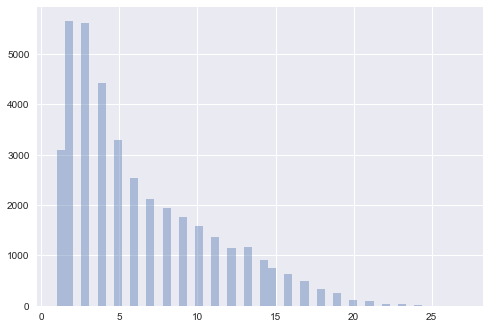

In [38]:
sns.distplot(topics, kde = False)
plt.show()

In [47]:
review_chinese.groupby('business_id').count().sort_values(by='review_id', ascending = False)

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
yfxDa8RFOvJPQh0rNtakHA,2446,2446,2446,2446,2446,2446,2446,2446
pH0BLkL4cbxKzu471VZnuA,1972,1972,1972,1972,1972,1972,1972,1972
X8c23dur0ll2D9XTu-I8Qg,1548,1548,1548,1548,1548,1548,1548,1548
GJ_bXUPv672YwNg4TneJog,1319,1319,1319,1319,1319,1319,1319,1319
cHdJXLlKNWixBXpDwEGb_A,1262,1262,1262,1262,1262,1262,1262,1262
_j2EtQtgLuXGRBfbM5YwZA,908,908,908,908,908,908,908,908
CCRgGKhzxSpl38w7yhqKUw,863,863,863,863,863,863,863,863
1ZnVfS-qP19upP_fwOhZsA,769,769,769,769,769,769,769,769
vx4YAA02Qz6khRD1fZ1MFA,749,749,749,749,749,749,749,749


In [48]:
len(set(review_chinese['business_id']))

3775

In [116]:
def get_avg_k_index_for_doc(doc, vec, tm):
    sent_text = nltk.sent_tokenize(doc)
    if (int(len(sent_text)) == 0):
        return []
    else:
        tm_mat = tm.components_
        k_index = np.array([0.]*tm_mat.shape[0])
        for s in sent_text:
            k, p = get_k_index(s, vec, tm)
            k_index += p
        return k_index/int(len(sent_text))

In [109]:
sampleA

"Simply the best all around place for sushi and even for a mixed group of sushi lovers and haters. This is the best reasonably priced sushi I have yet to find. Friends I've taken here who do not like sushi ordered the Chinese menu items and were very satisfied. The Flaming Volcano is a great treat. They also have a good selection of beers and saki. I have yet to have reason to not keep returning for more."

In [110]:
get_avg_k_index_for_doc(sampleA, vec3, tm3)

array([  3.94634474e-02,   1.32323845e-02,   3.83617802e-03,
         3.66614097e-03,   3.82883277e-04,   2.99406016e-02,
         1.38023238e-01,   1.68563411e-01,   2.37615697e-03,
         5.37376657e-04,   4.31089720e-04,   2.69874138e-03,
         1.94580586e-03,   1.25332138e-03,   1.63061941e-04,
         1.61956929e-01,   1.33776426e-03,   1.06648495e-03,
         2.20229750e-04,   6.32854603e-02,   1.97203386e-03,
         2.05439756e-04,   3.90002459e-03,   8.78498716e-03,
         1.94131376e-03,   1.15034632e-02,   2.69945683e-03,
         1.46574180e-04,   1.28868365e-01,   3.18192263e-04,
         6.73118688e-03,   4.32124954e-03,   1.63376810e-02,
         8.85311801e-03,   1.50426009e-03,   3.43122986e-02,
         3.62646960e-02,   3.31855458e-02,   2.45888377e-03,
         7.06873431e-04,   1.13752879e-03,   4.76390313e-03,
         9.38607384e-05,   4.01809718e-03,   9.77852233e-04,
         2.57514311e-03,   1.05657676e-02,   3.49143431e-02,
         3.55679021e-04,

## Run this algorithm across business

In [111]:
chinese_busi = list(set(review_chinese['business_id']))
random_busi = random.sample(chinese_busi,1000)

In [112]:
sample_table = review_chinese.loc[review_chinese['business_id'].isin(random_busi)]

In [137]:
def build_k_index_embedding(df, vec, tm):
    tm_mat = tm.components_
    k_index = np.array([0.]*tm_mat.shape[0])
    for d in df['text']:
        k_index += get_avg_k_index_for_doc(d, vec, tm)
    return k_index/df['text'].shape[0]

In [140]:
db = []
for rnd in random_busi:
    tbl = sample_table[sample_table['business_id'] == rnd]
    emd = build_k_index_embedding(tbl, vec3, tm3)
    db.append({'business_id': rnd, 'embedding': emd})

In [141]:
embedding = pd.DataFrame(db)
embedding.to_csv('nmf_embedding.csv', index = False)
embedding.head()

,business_id,embedding
0,nGCKQlzat6nEKTImlpg_hg,"[0.0781881435569, 0.0473940032204, 0.005925661..."
1,BzgeGVOPetKDcgv9FCbpkw,"[0.0786754025339, 0.106504009297, 0.0067383764..."
2,ed1KHQwsAYyFDrlUdwqJBA,"[0.0229722741569, 0.0806617011109, 0.005695532..."
3,dN3-yXUI6ybiLhO-lF5oQg,"[0.0741564896637, 0.0758444297774, 0.005735341..."
4,9sbXPpRC_wDhCsp7qG2PDw,"[0.062646559351, 0.0657410457956, 0.0095256893..."


In [167]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

In [170]:
mat = []
for e in embedding['embedding'].values:
    mat.append(e)
x = np.matrix(mat)

In [171]:
y = cosine_similarity(x)

In [187]:
print (y[0][y[0].argsort()[:-10:-1]])
np.array(random_busi)[[y[0].argsort()[:-10:-1][0], y[0].argsort()[:-10:-1][1]]]

[ 1.          0.9509499   0.94207144  0.94089599  0.93912893  0.93455675
  0.93334819  0.93259955  0.93224084]


array(['nGCKQlzat6nEKTImlpg_hg', 'AbgNPAnuq8X90DUw5FQ2sQ'], 
      dtype='<U22')

In [210]:
pair = np.array(random_busi)[[y[0].argsort()[:-10:-1][0:10]]]

In [211]:
review_chinese[review_chinese['business_id'].isin(pair)]['text']

16330     Really a 2.5 for late night nibbles.  Being la...
16331     When I'm here, I usually go for their Egg & Sa...
16332     I am disheartened to hear that this restaurant...
16333     I came here for a family dinner last week. We ...
16334     I came here on a Friday night with my girlfrie...
16335     Service was excellent, tried it in the dead of...
16336     Whenever I have cravings for 'Steam Crab with ...
16337     Bullet Pointing this place:\n- They have your ...
16338     Good place to grab some casual Cantonese food ...
16339     Was here for lunch \nFood was good at a ok pri...
16340     Reliable joint for reasonably priced Chinese c...
16341     Dinner at Joy Fortune was an absolutely terrib...
16342     This is a hidden gem in Scarborough. I always ...
16343     Mega Sized?! \n\nJoy Fortune Chinese Cuisine's...
25133     Down an alley in Chinatown, with not great amb...
25134     Montreal Chinatown is mostly Toi-San cantonese...
25135     Mediocre food, Expensive, and 

In [212]:
for i in embedding[embedding['business_id'].isin(pair)]['embedding']:
    print (i)

[ 0.07818814  0.047394    0.00592566  0.00602883  0.00935639  0.02826509
  0.05203412  0.00423774  0.00997342  0.02285127  0.00380113  0.00740126
  0.02176925  0.02754538  0.01817729  0.01302385  0.00484512  0.00454063
  0.00195377  0.03885729  0.00341659  0.00048287  0.03316821  0.02315499
  0.01501381  0.02549433  0.02277803  0.01733264  0.00942348  0.00434789
  0.04536295  0.02244679  0.01033282  0.04733847  0.00539604  0.02523538
  0.04809526  0.03349761  0.02725064  0.00381239  0.00602043  0.0347539
  0.004257    0.04508567  0.00681838  0.00482515  0.00966625  0.04590681
  0.00702296  0.0060926 ]
[ 0.08417061  0.05919638  0.0070416   0.01013785  0.00814686  0.01386561
  0.04671435  0.00622744  0.00853081  0.0398738   0.00665877  0.0135748
  0.01934827  0.01764135  0.01919113  0.01429599  0.00897488  0.00358151
  0.00134402  0.04016761  0.00448328  0.00040914  0.01005792  0.02508681
  0.00954627  0.03185579  0.01375368  0.00339149  0.02327478  0.00764091
  0.03158982  0.0143427   0

In [213]:
business[business['business_id'].isin(pair)]

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
6884,1177 Central Parkway W,"{'RestaurantsTableService': False, 'GoodForMea...",E0h1kK-8P_DtBHk5ClVI_g,"[Chinese, Restaurants]",Mississauga,{},0,43.567516,-79.659601,Bayview Garden Chinese Cuisine,,L5C 4P3,28,3.0,ON
12869,8390 Kennedy Road,"{'RestaurantsTableService': True, 'GoodForMeal...",0-jZq2P4eN7fRdt4Ls1QZQ,"[Fast Food, Restaurants, Chinese, Breakfast & ...",Markham,"{'Monday': '7:00-23:00', 'Tuesday': '7:00-23:0...",1,43.861241,-79.303877,Ming's Restaurant,Unionville,L3R 0W4,30,3.5,ON
45738,"4080 Steeles Avenue E, Unit 3-5","{'RestaurantsTableService': True, 'GoodForMeal...",Lv9wzkvPrVG-VdPGcw53_A,"[Restaurants, Seafood, Chinese]",Markham,"{'Monday': '11:00-0:00', 'Tuesday': '11:00-0:0...",1,43.822623,-79.313552,Fishman Wharf Seafood,Scarborough,L3R 3N8,62,3.5,ON
49987,3453 Victoria Park Avenue,"{'RestaurantsTableService': True, 'GoodForMeal...",nGCKQlzat6nEKTImlpg_hg,"[Restaurants, Food, Beer, Wine & Spirits, Chin...",Toronto,"{'Monday': '10:00-2:30', 'Tuesday': '10:00-2:3...",0,43.747473,-79.311690,Joy Fortune Chinese Cuisine,,M1W 2N6,14,3.0,ON
93906,"5308 Highway 7, Suite 5 & 6","{'GoodForMeal': {'dessert': False, 'latenight'...",Cs8BaiKkyNU6mzxq9nTsmg,"[Chinese, Restaurants]",Markham,"{'Monday': '10:30-0:00', 'Tuesday': '10:30-0:0...",1,43.868519,-79.282390,Congee Queen,Unionville,L3P 1B9,150,4.0,ON
113693,"350 Highway 7 E, Unit 101","{'RestaurantsTableService': True, 'GoodForMeal...",AbgNPAnuq8X90DUw5FQ2sQ,"[Restaurants, Chinese]",Richmond Hill,"{'Monday': '8:30-23:00', 'Tuesday': '8:30-23:0...",1,43.840971,-79.398121,My Wonderful Kitchen,,L4B 3N2,99,3.0,ON
135816,84 Rue de la Gauchetière Ouest,"{'GoodForMeal': {'dessert': False, 'latenight'...",ajkx7NWnjraj_uz20mdbhQ,"[Chinese, Restaurants]",Montréal,{},1,45.507047,-73.560486,Restaurant Cuisine Cantonaise,Ville-Marie,H2Z 1C1,22,3.0,QC
144197,8380 Kennedy Road,"{'GoodForMeal': {'dessert': False, 'latenight'...",dPVCSAu8xVIDXD-C3s6c5Q,"[Chinese, Restaurants]",Markham,"{'Monday': '11:00-22:00', 'Tuesday': '11:00-22...",0,43.860726,-79.304713,Luxurban Kitchen,Unionville,L3R 0W4,14,4.0,ON
144961,"328 Highway 7 E, Unit B1 & B2","{'RestaurantsTableService': True, 'GoodForMeal...",O_9K3WhlGlXW3KFPfTo0yA,"[Chinese, Restaurants]",Richmond Hill,"{'Monday': '10:00-22:30', 'Tuesday': '10:00-22...",1,43.840876,-79.399699,Steam Kitchen,,L4B 3P7,34,2.5,ON


In [217]:
set(business[business['business_id'].isin(random_busi)]['city'])

{'Ajax',
 'Arnold',
 'Aurora',
 'Avon',
 'Avondale',
 'Bay Village',
 'Beachwood',
 'Bedford',
 'Bellevue',
 'Belmont',
 'Bethel Park',
 'Boulder City',
 'Brampton',
 'Bridgeville',
 'Brook Park',
 'Brooklin',
 'Brossard',
 'Böblingen',
 'Canonsburg',
 'Carefree',
 'Carnegie',
 'Champaign',
 'Chandler',
 'Chardon',
 'Charlotte',
 'Chateauguay',
 'Cleveland',
 'Cleveland Heights',
 'Concord',
 'Cornelius',
 'Cramerton',
 'Cuyahoga Falls',
 'De Forest',
 'Ditzingen',
 'Dollard-Des-Ormeaux',
 'East Pittsburgh',
 'Edimbourg',
 'Edinburgh',
 'Elyria',
 'Etobicoke',
 'Filderstadt',
 'Fort Mill',
 'Fountain Hills',
 'Gastonia',
 'Georgetown',
 'Gerlingen',
 'Gibsonia',
 'Gilbert',
 'Glassport',
 'Glendale',
 'Goodyear',
 'Harrisburg',
 'Hemmingen',
 'Henderson',
 'Higley',
 'Homestead',
 'Huntersville',
 'Indian Trail',
 'Irwin',
 'Kannapolis',
 'Kent',
 'Korntal-Münchingen',
 "L'Île-Perrot",
 'Lake Wylie',
 'Lakewood',
 'Las Vegas',
 'Laval',
 'Laveen',
 'Leonberg',
 'Litchfield Park',
 'Lon

I discovered the similarity in Canadian Chinese restrant reviews